# Introduction 

- Project Name: House Prices: Advanced Regression Techniques 
- [Project Link on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- Project Objective:
    <br> This goal of the project is to predict sale price of each residential home in Ames, Iowa with historical sales data in that area in between year 2006-2010. 

# Data To Begin With
- Historical House Sales: train.csv
- House Prices to Priect: test.csv 
- Full description of features/cols in the datasets: data_description.txt

Each dataset contains 1 Id column and 79 columns spaning across house features may being relevant to house prices. The features include both numerical features(continuous and discrete) such as Lot size and number of garages and categorical features(nominal and ordinal) such as neighborhood and overall condition rating of each house. 

Number of Entries by Dataset
     1. train.csv(1-1460, total 1460 entries)
     2. test.csv(1461-2919, total 1450 entries)
     
Number of Colunms by Dataset
     1. train.csv(81 col: 79 features + 1 Id + 1 SalePrice) 
     2. test.csv(80 col: 79 features + 1 Id)      

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

#To visualize the whole grid
pd.options.display.max_columns = 999

In [208]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [209]:
train['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

# Data Peek

- head,  tail, info, describe

### Train

In [210]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [211]:
train.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [213]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [214]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [215]:
test.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [217]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Outlier in Train DataSet
- drop train outlier ('GrLivArea' vs 'SalePrice')
- Known 2 Outlier in the dataset 'train.csv'(from another description file of the project on Kaggle.com) 

---- 
`Quote`

5 observations (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly): 3 true outliers (Partial Sales that likely donít represent actual market values) and 2 outliers are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations)"

----

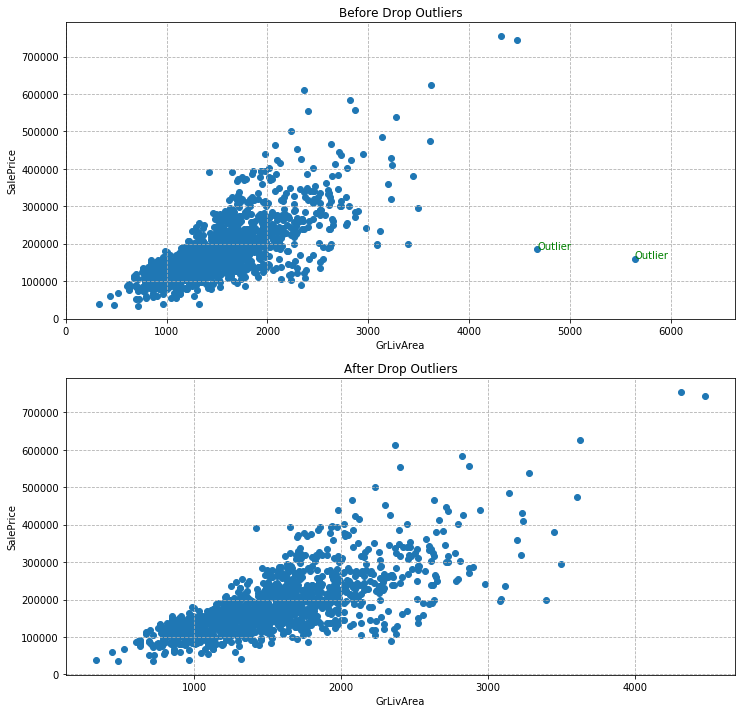

In [218]:
fig,axes = plt.subplots(nrows=2, ncols=1,figsize = (12,12))
axes[0].grid(linestyle='dashed')
axes[1].grid(linestyle='dashed')

# Plot Before Drop Outliers
x = train['GrLivArea']
y = train['SalePrice']
axes[0].set_xlabel('GrLivArea');
axes[0].set_ylabel('SalePrice');
axes[0].set_xlim(0,max(x)+1000)
axes[0].set_title('Before Drop Outliers')
axes[0].scatter(x,y);
    # Label Outliers
text = 'Outlier'
outlier = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)][['GrLivArea','SalePrice']]
x = outlier['GrLivArea']
y = outlier['SalePrice']
for i in outlier.index:
    axes[0].text(x[i],y[i],text,color='green')
    
# Drop the Outliers
train = train.drop(outlier.index)
train = train.reset_index(drop=True)

# Plot after Drop Outliers
x = train['GrLivArea']
y = train['SalePrice']
axes[1].set_xlabel('GrLivArea');
axes[1].set_ylabel('SalePrice');
axes[1].set_title('After Drop Outliers')
axes[1].scatter(x,y);    

In [219]:
train['SalePrice'].isnull().sum()

0

## Missing Value Peek

In [220]:
# Concate train & test
X = pd.concat([train.iloc[:,0:-1], test], ignore_index=True)

In [221]:
X.shape

(2917, 80)

In [222]:
X.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2916,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Retrieve all the features containing missing value 
- Sorted by number of missing values

In [223]:
from functools import reduce

In [224]:
dfs = []
for df,df_name in ((train,'df_train'),(test,'df_test'),(X,'df_X')):
    miss_value = df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False)
    column_name = df_name+'NaNs'
    df_name= pd.DataFrame(miss_value, columns=[column_name])
    df_name.index.names= ['Feature']
    df_name.reset_index(level=0, inplace=True)
    dfs.append(df_name)
    
miss_values = reduce(lambda left,right: pd.merge(left,right, on=['Feature'],how='outer'),dfs)
miss_values

,Feature,df_trainNaNs,df_testNaNs,df_XNaNs
0,PoolQC,1452.0,1456.0,2908
1,MiscFeature,1404.0,1408.0,2812
2,Alley,1367.0,1352.0,2719
3,Fence,1177.0,1169.0,2346
4,FireplaceQu,690.0,730.0,1420
5,LotFrontage,259.0,227.0,486
6,GarageYrBlt,81.0,78.0,159
7,GarageType,81.0,76.0,157
8,GarageFinish,81.0,78.0,159
9,GarageQual,81.0,78.0,159


## Missing Value Imputation 
- Here imputed Train&Test together, this is a "Data Leakage Approach", which would cause data leakage between Train and Test datasets. Choosing this approach is more of a improving-score-on-Leaderboard reason. 
- Generally, proper imputation should treat Train and Test seperately to have the final model to better generalize on unseen data. 

### PoolQC

| Columns  | Train-NaN | Test-NaN | Meaning                  | Original Datatype |
|----------|-----------|----------|--------------------------|-------------------|
| PoolArea | 0         | 0        | Pool area in square feet | int64 (continous) |
| PoolQC   | 1452      | 1456     | Pool quality             | object (types)    |

- Missing Value:
    - Fake Missing Value ('PoolQC' NaN with 'PoolArea'0)
        -  according to data_description.txt: NaN = No Pool
    - True Missing Value ('PoolQC' NaN ≠ 'PoolArea'0):
        - 3 entries 

**True Missing value:  PoolQC (NAN) but PoolArea≠0**

In [225]:
cols = ['PoolQC','PoolArea']
mask = (X['PoolArea']!=0)&(X['PoolQC'].isnull())
X[mask][cols]

,PoolQC,PoolArea
2418,NaN,368
2501,NaN,444
2597,NaN,561


Ex     4
Gd     3
NaN    3
Fa     2
Name: PoolQC, dtype: int64


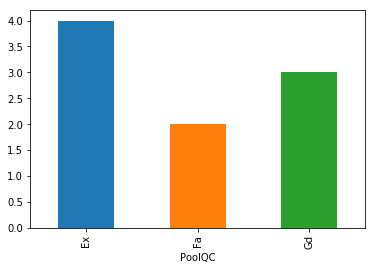

In [226]:
# Value Counts
mask = X['PoolArea']!=0
print(X.loc[mask,'PoolQC'].value_counts(dropna=False))
X.loc[mask].groupby('PoolQC').count()['Id'].plot.bar()
plt.show()

In [227]:
# Fill 3 entries ('PoolQC'= NaN but'PoolArea'≠ 0): 
# PoolQC: NaN => 'Ex' (most occuring value)
X.loc[mask,'PoolQC'] = X.loc[mask,'PoolQC'].fillna(value = 'Ex')

**Fake Missing value:  PoolQC (NAN) & PoolArea = 0**
- PoolQC: Fill NaN => 'None'

In [228]:
# Fill entries ('PoolQC'= NaN & 'PoolArea'=0): 
X['PoolQC'] = X['PoolQC'].fillna(value='None')

Check after Fill

In [229]:
X['PoolQC'].value_counts(dropna=False)

None    2905
Ex         7
Gd         3
Fa         2
Name: PoolQC, dtype: int64

### MiscFeature 

| Columns     | Train-NaN | Test-NaN | Meaning                                               | Original Datatype |
|-------------|-----------|----------|-------------------------------------------------------|-------------------|
| MiscFeature | 1404      | 1408     | Miscellaneous feature not covered in other categories | object (types)    |
| MiscVal     | 0         | 0        | Value of miscellaneous feature ($)                    | int64 (continous) |


- Missing Value:
    - Fake Missing Value ('MiscFeature' NaN & 'MiscVal'= 0)
        -  according to data_description.txt: NaN = None MiscFeature
    - True Missing Value (MisFeature = NaN & MiscVal ≠0 ):
        - 1 entries 

**True Missing Value (MisFeature = NaN & MiscVal ≠0 )**

In [230]:
cols = ['MiscFeature','MiscVal']
mask = (X[cols].isnull().any(axis=1))&(X['MiscVal']!=0)
X[mask][cols].head()

,MiscFeature,MiscVal
2547,NaN,17000


Shed    93
Gar2     5
Othr     3
TenC     1
NaN      1
Name: MiscFeature, dtype: int64


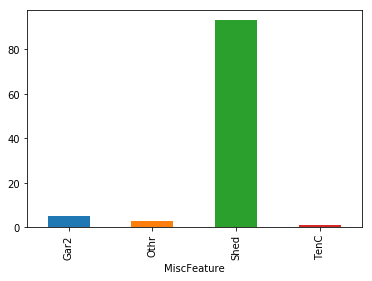

In [231]:
# Value Counts
mask = (X['MiscVal']!=0)
print(X.loc[mask,'MiscFeature'].value_counts(dropna=False))
X.loc[mask].groupby('MiscFeature').count()['Id'].plot.bar()
plt.show()

Even most occuring 'MiscFeature' is Shed, fill this 'MiscFeature' NaN entry with 'Othr', since 'Othr' by definition includes all types of not-known 'MiscFeature'. 

In [232]:
# Fillna 1 entry (MisFeature = NaN & MiscVal ≠0 ): 
X.loc[mask,'MiscFeature'] = X.loc[mask,'MiscFeature'].fillna(value='Othr')

**Fake Missing Value ('MiscFeature' NaN & 'MiscVal'= 0)**
- Fill with 'None'

In [233]:
# Fillna 1047 entries ('MiscFeature' NaN & 'MiscVal'=0):
# Fill 'MiscFeature' NaN => 'None' 
X['MiscFeature']=X['MiscFeature'].fillna(value='None')

Check after Fill

In [234]:
X['MiscFeature'].value_counts(dropna=False)

None    2811
Shed      95
Othr       5
Gar2       5
TenC       1
Name: MiscFeature, dtype: int64

### Alley   

| Columns  | Train-NaN | Test-NaN | Meaning                          | Original Datatype |
|----------|-----------|----------|----------------------------------|-------------------|
| Alley    | 1367      | 1352     | Type of alley access to property | object (types)    |

- Missing Value:
    -  according to data_description.txt: NaN = No alley access

In [235]:
# Fillna: NaN (Alley) = 'None'
X['Alley'] = X['Alley'].fillna(value='None')

In [236]:
# Check after Fill
X['Alley'].value_counts(dropna=False)

None    2719
Grvl     120
Pave      78
Name: Alley, dtype: int64

### Fence    

| Columns  | Train-NaN | Test-NaN | Meaning                          | Original Datatype |
|----------|-----------|----------|----------------------------------|-------------------|
| Fence    | 1177      | 1169     | Fence quality                    | object (types)    |

-  Missing Value:
    - according to data_description.txt:  NaN = No Fence

In [237]:
# Fill NaN('Fence') = 'None'
X['Fence'] = X['Fence'].fillna(value='None')

In [238]:
# Check after Fill
X['Fence'].value_counts(dropna=False)

None     2346
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

### FireplaceQu 

| Columns     | Train-NaN | Test-NaN | Meaning              | Original Datatype |
|-------------|-----------|----------|----------------------|-------------------|
| Fireplaces  | 0         | 0        | Number of fireplaces | int64 (Discrete)  |
| FireplaceQu | 690       | 730      | Fireplace quality    | object (Types)    |

- Missing Value (all 'FireplaceQu' NaN : 'Fireplaces'=0):
    - according to data_description.txt: NaN = None

In [239]:
cols = ['FireplaceQu','Fireplaces']
mask = (X[cols].isnull().any(axis=1))&(X['Fireplaces']!=0)
X[mask][cols].head()

,FireplaceQu,Fireplaces


In [240]:
# Fill 'FireplaceQu' NaN = 'None' 
X['FireplaceQu'] = X['FireplaceQu'].fillna(value='None')

In [241]:
# Check after fill
X['FireplaceQu'].value_counts(dropna=False)

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

### Garage Related Features

| Columns      | Train-NaN | Test-NaN | Meaning                        | Original Datatype |
|--------------|-----------|----------|--------------------------------|-------------------|
| GarageType   | 81        | 76       | Garage location                | object (Types)    |
| GarageYrBlt  | 81        | 78       | Year garage was built          | float64(Discrete) |
| GarageFinish | 81        | 78       | Interior finish of the garage  | object (Types)    |
| GarageQual   | 81        | 78       | Garage quality                 | object (Types)    |
| GarageCond   | 81        | 78       | Garage condition               | object (Types)    |
| GarageCars   | 0         | 1        | Size of garage in car capacity | int64(Continuous) |
| GarageArea   | 0         | 1        | Size of garage in square feet  | int64(Continuous) |                      

- Missing Value:
    - Fake Missing Value ('Garage' related Categorical cols' NaN with 'GarageCars'& 'GarageArea'= 0 or NaN)
        -  according to data_description.txt: NaN = No Garage 
    - True Missing Value (''Garage' related Categorical cols' NaN with 'GarageCars' or 'GarageArea'≠ 0) 
    
- Abnormal Data:
    - GarageYrBlt < YearBuilt (GarageYrBlt ≠0)
    - GarageYrBlt > Current Year
    - YearRemodAdd < YearBuilt

In [242]:
# Retrieve Column list relating to Garage 
r = re.compile(".*garage.*", re.IGNORECASE) #case insensitive 
cols = list(filter(r.match,X.columns))
cols

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [243]:
# Recall number of NaNs in each "Garage" columns
X[cols].isnull().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

In [244]:
# Check entries with 'GarageCars'(1 NaN) or 'GarageArea'(1 NaN)
mask = (X['GarageCars'].isnull())|(X['GarageArea'].isnull())
X[mask][cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2574,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


Do not drop this entry, since it is from test dataset

In [245]:
# col list except 'GarageCars' & 'GarageArea'
cols_reduced = cols.copy()
cols_reduced.remove('GarageCars')
cols_reduced.remove('GarageArea')
cols_reduced

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [246]:
# check entries with True "No Garage"
# with (cols_reduces:NaN, 'GarageCars'=0, 'GarageArea'=0) 
mask_all = (X[cols_reduced].isnull().all(axis=1))&(X['GarageCars']==0)&(X['GarageArea']==0)
print(X[mask_all][cols].shape)
X[mask_all][cols].head(3)

(157, 7)


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN


True "No Garage"
1. ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond') : Fill with 'None'
2. ('GarageYrBlt'): No Garage = 0
    - even 'GarageYrBlt' is highly correlated with 'Yearbuilt', GarageYrBlt still contain some information. (see `'GarageYrBlt'-'YearBuilt' correlation investigation` Section)
    - to differenciate ('GarageYrBlt' = 'Yearbuilt') with (No Garage), assign  No Garage = 0 (or some arbitrary number).

In [247]:
# Fill the 157 entries with True "No Garage"

# 1: 'GarageYrBlt' (value =0)
X.loc[mask_all,'GarageYrBlt'] = X.loc[mask_all,'GarageYrBlt'].fillna(value=0)

# 2: 'GarageType','GarageFinish','GarageQual','GarageCond' (value = 'None')
cols_reduced.remove('GarageYrBlt')
X.loc[mask_all,cols_reduced] = X.loc[mask_all,cols_reduced].fillna(value='None')

In [248]:
# Check after fill 157 True 'No Garage'
for col in cols:
    print('{}: value_counts {}'.format(col, X.loc[mask_all,col].value_counts(dropna=False).to_dict()))

GarageType: value_counts {'None': 157}
GarageYrBlt: value_counts {0.0: 157}
GarageFinish: value_counts {'None': 157}
GarageCars: value_counts {0.0: 157}
GarageArea: value_counts {0.0: 157}
GarageQual: value_counts {'None': 157}
GarageCond: value_counts {'None': 157}


Garage True Missing Value (≠ No Garage)

In [249]:
# any entries with Garage NaN (after dealt with 'No Garage')
mask_any = X[cols].isnull().any(axis=1)
X.loc[mask_any,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2124,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2574,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
cols_reduced.remove('GarageType')
cols_reduced.append('GarageCars')
cols_reduced

['GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars']

In [251]:
# 1: GarageYrBlt: fill with 'YearBuilt' (highly correlated)
X.loc[mask_any, 'GarageYrBlt'] = X.loc[mask_any, 'GarageYrBlt'].fillna(value=X.loc[mask_any, 'YearBuilt'])

# 2: 'GarageFinish','GarageCars','GarageQual','GarageCond'
# fill with most occurring value in each feature (GarageType = Detchd)
mask = X['GarageType']=='Detchd'
for col in cols_reduced:
    most_occr = X.loc[mask, col].mode().iloc[0] 
    X.loc[mask_any, col] = X.loc[mask_any, col].fillna(value = most_occr)

# 3: 'GarageArea'
# fill with mean value of GarageArea'(GarageType = Detchd)
area_mean = X.loc[mask,'GarageArea'].mean()
X.loc[mask_any, 'GarageArea'] = X.loc[mask_any, 'GarageArea'].fillna(value = area_mean)

In [252]:
# Check after fill
X.loc[mask_any,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2124,Detchd,1910.0,Unf,1.0,360.000000,TA,TA
2574,Detchd,1923.0,Unf,2.0,419.492288,TA,TA


----------------

`'GarageYrBlt'-'YearBuilt' correlation investigation` 

In [253]:
cols_Yr = ['YearBuilt','YearRemodAdd','GarageYrBlt']
mask_0 = X['GarageYrBlt']!=0 # remove "No Garage" Entries
X[mask_0][cols_Yr].corr(method='pearson')

,YearBuilt,YearRemodAdd,GarageYrBlt
YearBuilt,1.000000,0.632737,0.835133
YearRemodAdd,0.632737,1.000000,0.650151
GarageYrBlt,0.835133,0.650151,1.000000


Text(0,0.5,'GarageYrBlt')

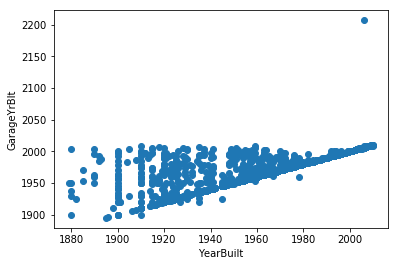

In [254]:
# Scatter plot 'YearBuilt'-'GarageYrBlt'b
fig, ax = plt.subplots()
x = X[mask_0]['YearBuilt']
y = X[mask_0]['GarageYrBlt']
ax.scatter(x,y)
ax.set_xlabel('YearBuilt')
ax.set_ylabel('GarageYrBlt')

2216


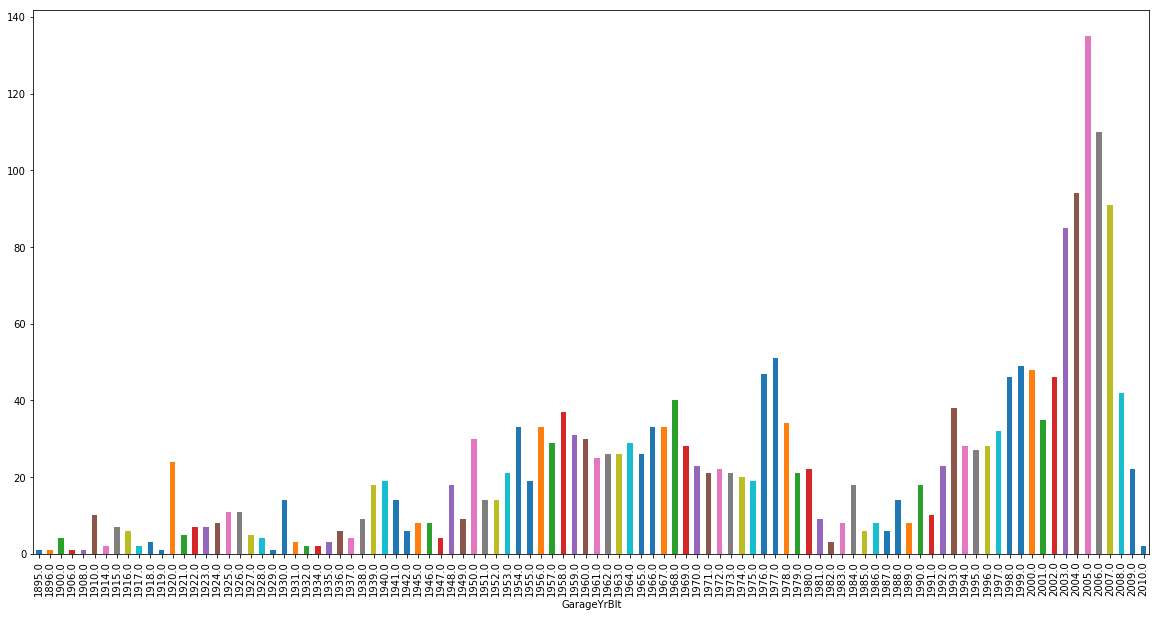

In [255]:
mask_1 = (X['GarageYrBlt']==X['YearBuilt'])
print(X.loc[mask_1].count()[0])
X.loc[mask_1].groupby('GarageYrBlt').count()['Id'].plot(kind="bar", figsize=(20,10))
plt.show()

97


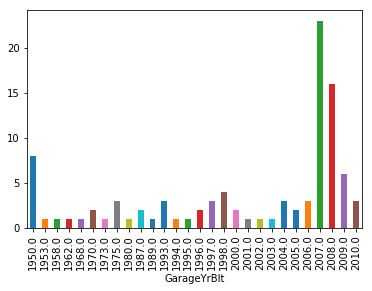

In [256]:
mask_2 = (X['GarageYrBlt']==X['YearRemodAdd'])&(X['GarageYrBlt']!=X['YearBuilt'])
print(X.loc[mask_2].count()[0])
X.loc[mask_2].groupby('GarageYrBlt').count()['Id'].plot.bar()
plt.show()

------------------

Correct **GarageYrBlt Anomaly** Above
- GarageYrBlt < YearBuilt (GarageYrBlt ≠0)
- GarageYrBlt > Current Year

In [257]:
X['GarageYrBlt']=X['GarageYrBlt'].astype(int) # float -> int
mask = mask_0&((X['GarageYrBlt']< X['YearBuilt'])|(X['GarageYrBlt']>2019))
print(X[mask][cols_Yr].shape)
X[mask][cols_Yr].head(3)

(19, 3)


,YearBuilt,YearRemodAdd,GarageYrBlt
29,1927,1950,1920
93,1910,1998,1900
324,1967,2007,1961


In [258]:
# both conditions: replace with (GarageYrBlt = YearBuilt)
X.loc[mask,'GarageYrBlt'] = X.loc[mask,'YearBuilt']

# Check after replace
X[mask][cols_Yr].head(3)

,YearBuilt,YearRemodAdd,GarageYrBlt
29,1927,1950,1927
93,1910,1998,1910
324,1967,2007,1967


**YearRemodAdd Anomaly**
- YearRemodAdd < YearBuilt

In [259]:
mask = X['YearRemodAdd']<X['YearBuilt']
X[mask][cols_Yr]

,YearBuilt,YearRemodAdd,GarageYrBlt
1874,2002,2001,2002


In [260]:
# replace with (YearRemodAdd = YearBuilt)
X.loc[mask,'YearRemodAdd'] = X.loc[mask,'YearBuilt']

# check after replace
X[mask][cols_Yr]

,YearBuilt,YearRemodAdd,GarageYrBlt
1874,2002,2002,2002


### Bsmt Features

| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| BsmtQual     | 37        | 44       | Evaluates the height of the basement                 | object (Types)    |
| BsmtCond     | 37        | 45       | Evaluates the general condition of the basement      | object (Types)    |
| BsmtExposure | 38        | 44       | Refers to walkout or garden level walls              | object (Types)    |
| BsmtFinType1 | 37        | 42       | Rating of basement finished area                     | object (Types)    |
| BsmtFinType2 | 38        | 42       | Rating of basement finished area (if multiple types) | object (Types)    |
| BsmtFinSF1   | 0         | 1        | Type 1 finished square feet                          | int64(Continuous) |
| BsmtFinSF2   | 0         | 1        | Type 2 finished square feet                          | int64(Continuous) |
| BsmtUnfSF    | 0         | 1        | Unfinished square feet of basement area              | int64(Continuous) |
| TotalBsmtSF  | 0         | 1        | Total square feet of basement area                   | int64(Continuous) |
| BsmtFullBath | 0         | 2        | Basement full bathrooms                              | int64(Discrete)   |
| BsmtHalfBath | 0         | 2        | Basement half bathrooms                              | int64(Discrete)   |

- Missing Value:
    - Fake Missing Value ('Bsmt' Categorical cols = NaN &'Bsmt' Numerical Features = 0 or NaN)
        -  according to data_description.txt: NaN = No Bsmt
    - True Missing Value ('Bsmt' Categorical cols = NaN while one or more'Bsmt' Numerical Features ≠ 0)

In [261]:
# Retrieve Column list relating to Basement 
r = re.compile(".*bsmt.*", re.IGNORECASE)
cols = list(filter(r.match,X.columns))
cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [262]:
X[cols].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1       1
BsmtFinType2    80
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [263]:
# Entrires with All Bsmt Features = NaN
mask_all = X[cols].isnull().all(axis=1)
X.loc[mask_all, cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
# Fill this 1 entry (All Bsmt Features = NaN)

# 1. Fill Bsmt Categorical features with 'None'
# ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
cols_obj = X[cols].dtypes[X[cols].dtypes == object].index.tolist()
print('obj:', cols_obj)
X.loc[mask_all, cols_obj]=X.loc[mask_all, cols_obj].fillna(value='None')

# 2. Fill Bsmt Numerical features with 
cols_num = [col for col in cols if col not in cols_obj]
print('num:',cols_num)
X.loc[mask_all, cols_num]=X.loc[mask_all, cols_num].fillna(value=0)

# Check after fill
X.loc[mask_all, cols]

obj: ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
num: ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2118,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0


In [265]:
# update Bsmt cols with NaN
mask = X[cols].isnull().any()
cols_reduced = mask[mask].index.tolist()
print(cols_reduced)
X[cols_reduced].isnull().sum()

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath']


BsmtQual        80
BsmtCond        81
BsmtExposure    81
BsmtFinType1    78
BsmtFinType2    79
BsmtFullBath     1
BsmtHalfBath     1
dtype: int64

In [266]:
# Entrires with BsmtFullBath or BsmtHalfBath = NaN
mask = (X['BsmtFullBath'].isnull())|(X['BsmtHalfBath'].isnull())
X.loc[mask,cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2186,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [267]:
# Fill above 1 entry

#  1. Fill Bsmt Categorical features with 'None' 
X.loc[mask,cols_obj] = X.loc[mask,cols_obj].fillna(value='None')

# 2. Fill Bsmt Numerical features with 0
X.loc[mask,['BsmtFullBath','BsmtHalfBath']] = X.loc[mask,['BsmtFullBath','BsmtHalfBath']].fillna(value=0)

# Check after fill
X.loc[mask,cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2186,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0


In [268]:
# update Bsmt cols with NaN
mask = X[cols].isnull().any()
cols_reduced = mask[mask].index.tolist()
print(cols_reduced)
X[cols_reduced].isnull().sum()

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']


BsmtQual        79
BsmtCond        80
BsmtExposure    80
BsmtFinType1    77
BsmtFinType2    78
dtype: int64

In [269]:
# Entries: updated Bsmt cols with NaN and Bsmt numerical features =0
mask_all = (X[cols_reduced].isnull().all(axis=1))&((X[cols_num]==0).all(axis=1))
print(X.loc[mask_all,cols].shape)
X.loc[mask_all,cols].head(3)

(77, 11)


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [270]:
#  Fill Bsmt Categorical features with 'None' 
X.loc[mask_all,cols_obj] = X.loc[mask_all,cols_obj].fillna(value='None')

# Check after fill
X.loc[mask_all,cols].head(3)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0
39,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0
90,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0


In [271]:
# update Bsmt cols with NaN left
mask = X[cols].isnull().any()
cols_reduced = mask[mask].index.tolist()
print(cols_reduced)
X[cols_reduced].isnull().sum()

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2']


BsmtQual        2
BsmtCond        3
BsmtExposure    3
BsmtFinType2    1
dtype: int64

In [272]:
# Entries: Bsmt cols with NaN left
mask_any = (X[cols_reduced].isnull().any(axis=1))
X.loc[mask_any, cols_reduced]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2
332,Gd,TA,No,NaN
947,Gd,TA,NaN,Unf
1485,Gd,TA,NaN,Unf
2038,Gd,NaN,Mn,Rec
2183,TA,NaN,No,Unf
2215,NaN,Fa,No,Unf
2216,NaN,TA,No,Unf
2346,Gd,TA,NaN,Unf
2522,TA,NaN,Av,Unf


In [273]:
# Fill above entries with most-occurring value (but not 'None') in each col
for col in cols_reduced:
    mask = X[col]!='None'
    most_occr = X.loc[mask, col].mode().iloc[0]
    X.loc[mask_any, col] = X.loc[mask_any, col].fillna(value = most_occr)

# Check after fill    
X.loc[mask_any, cols_reduced]  

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2
332,Gd,TA,No,Unf
947,Gd,TA,No,Unf
1485,Gd,TA,No,Unf
2038,Gd,TA,Mn,Rec
2183,TA,TA,No,Unf
2215,TA,Fa,No,Unf
2216,TA,TA,No,Unf
2346,Gd,TA,No,Unf
2522,TA,TA,Av,Unf


### LotFrontage

| Columns     | Train-NaN | Test-NaN | Meaning                                     | Original Datatype   |
|-------------|-----------|----------|---------------------------------------------|---------------------|
| LotFrontage | 259       | 227      | Linear feet of street connected to property | float64(Continuous) |
| LotArea     | 0         | 0        | Lot size in square feet                     | int64(Continuous)   |
| LotShape    | 0         | 0        | General shape of property                   | object(Types)       |
| LotConfig   | 0         | 0        | Lot configuration                           | object(Types)       |

- KNN imputation (fancyimpute package)
    - k = 5
    - based on features: 'LotArea','1stFlrSF','GarageArea','GrLivArea','MSSubClass'
    
Posts&Articles on Various ways of missing value imputation
- [AlviraSwalin:handle-missing-data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) 
- [k-nearest-neighbor-imputation-explanation](https://stats.stackexchange.com/questions/327074/k-nearest-neighbor-imputation-explanation)
- [KNN imputation by Beretta and Santaniello](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4959387/)
- [YohanObadia:use-of-knn-for-missing-values](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

In [274]:
# retrive cols of Lot
r = re.compile(".*lot.*",re.IGNORECASE)
cols = list(filter(r.match,X.columns))
cols

['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']

In [275]:
X[cols].isnull().sum()

LotFrontage    486
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

In [276]:
# Correlations of LotFrontage with other features:

corr_Lot = X.corr(method='pearson')
corr_Lot['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
LotArea          0.468809
1stFlrSF         0.434338
GrLivArea        0.356856
GarageArea       0.349425
TotRmsAbvGrd     0.340943
TotalBsmtSF      0.317119
GarageCars       0.315097
Fireplaces       0.251541
BedroomAbvGr     0.239666
OverallQual      0.208813
MasVnrArea       0.206618
FullBath         0.180025
BsmtFinSF1       0.175524
OpenPorchSF      0.148661
PoolArea         0.124837
WoodDeckSF       0.119489
YearBuilt        0.119417
BsmtUnfSF        0.116131
GarageYrBlt      0.104010
BsmtFullBath     0.100313
YearRemodAdd     0.087807
ScreenPorch      0.079306
BsmtFinSF2       0.050014
MiscVal          0.045851
HalfBath         0.033419
3SsnPorch        0.029528
MoSold           0.018468
2ndFlrSF         0.017646
EnclosedPorch    0.013818
KitchenAbvGr     0.005967
LowQualFinSF     0.005596
YrSold          -0.008176
BsmtHalfBath    -0.025255
Id              -0.026128
OverallCond     -0.074545
MSSubClass      -0.427969
Name: LotFrontage, dtype: float64

- KNN imputation 
    - package: fancyimpute
    - excecution:
        - Based on a few features (with higher corr score, & no missing values or already filled beforehand)
        - didn't change scale

In [277]:
from fancyimpute import KNN

In [278]:
# Scale of the features for KNN impute
cols_knn = ['LotFrontage','LotArea','1stFlrSF','GarageArea','GrLivArea','MSSubClass']
mask = X['LotFrontage'].isnull()
X.loc[mask,cols_knn].head()

,LotFrontage,LotArea,1stFlrSF,GarageArea,GrLivArea,MSSubClass
7,NaN,10382,1107,484.0,2090,60
12,NaN,12968,912,352.0,912,20
14,NaN,10920,1253,352.0,1253,20
16,NaN,11241,1004,480.0,1004,20
24,NaN,8246,1060,270.0,1060,20


In [279]:
# KNN imputation(defalut k=5)
X[cols_knn] = KNN(k=5).fit_transform(X[cols_knn])

Imputing row 1/2917 with 0 missing, elapsed time: 1.287
Imputing row 101/2917 with 1 missing, elapsed time: 1.289
Imputing row 201/2917 with 0 missing, elapsed time: 1.291
Imputing row 301/2917 with 0 missing, elapsed time: 1.293
Imputing row 401/2917 with 0 missing, elapsed time: 1.298
Imputing row 501/2917 with 0 missing, elapsed time: 1.299
Imputing row 601/2917 with 0 missing, elapsed time: 1.301
Imputing row 701/2917 with 0 missing, elapsed time: 1.303
Imputing row 801/2917 with 0 missing, elapsed time: 1.304
Imputing row 901/2917 with 0 missing, elapsed time: 1.305
Imputing row 1001/2917 with 0 missing, elapsed time: 1.307
Imputing row 1101/2917 with 0 missing, elapsed time: 1.310
Imputing row 1201/2917 with 0 missing, elapsed time: 1.312
Imputing row 1301/2917 with 0 missing, elapsed time: 1.315
Imputing row 1401/2917 with 0 missing, elapsed time: 1.317
Imputing row 1501/2917 with 0 missing, elapsed time: 1.319
Imputing row 1601/2917 with 0 missing, elapsed time: 1.320
Imputing 

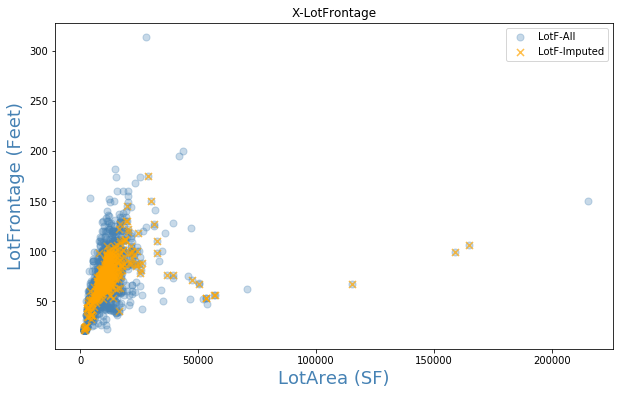

In [280]:
# visualize LotF-LotA Scatter (overall & Imputed)

fig, ax1= plt.subplots(figsize=(10,6))

x1 = X['LotArea']
x3 = X['LotFrontage']
z1 = X.loc[mask,'LotArea']
z3 = X.loc[mask,'LotFrontage'] #imputed data 

ax1.scatter(x1,x3,
            color='steelblue', s=50,alpha=0.3,
            label='LotF-All');
ax1.scatter(z1,z3,
            marker ='x', s=50,
            color='orange',alpha=0.7,
            label='LotF-Imputed');
ax1.set_xlabel('LotArea (SF)',color='steelblue',fontsize=18);
ax1.set_ylabel('LotFrontage (Feet)',color='steelblue',fontsize=18);
ax1.legend() # can specify loc: loc='upper center'
ax1.set_title('X-LotFrontage');

### MasVnr & Exterior Features

| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| MasVnrType  | 8       | 16 | Masonry veneer type                                             | object (types)      |
| MasVnrArea  | 8       |15| Masonry veneer area in square feet                              | float64 (continous) | 
| Exterior1st | 0       |1| Exterior covering on house                                      | object (types)      |
| Exterior2nd | 0       |1| Exterior covering on house (if > 1 material)                    | object (types)      | 
| ExterQual   | 0       |0| Evaluates the quality of the material on the exterior           | object (types)      | 
| ExterCond   | 0       |0| Evaluates the present condition of the material on the exterior | object (types)      |

- Missing Value:
    - Fake Missing Value ( Categorical cols = NaN & Numerical Features = 0 or NaN)
        -  according to data_description.txt: NaN = No MasVnrType
    - True Missing Value ( Categorical cols = NaN while one or more Numerical Features ≠ 0)
        - Mode Imputation


In [281]:
# list of columns relating to 'MasVnr' or 'Exter' 
r = re.compile(".*(Mas|Exter).*", re.IGNORECASE)
cols = list(filter(r.match,X.columns))
print(cols)
print(X[cols].isnull().sum())

['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond']
Exterior1st     1
Exterior2nd     1
MasVnrType     24
MasVnrArea     23
ExterQual       0
ExterCond       0
dtype: int64


#### Exterior

In [282]:
# entries with Exterior NaN
mask = X[['Exterior1st','Exterior2nd']].isnull().any(axis=1)
X.loc[mask,cols]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
2149,NaN,NaN,None,0.0,TA,TA


In [283]:
# fill 'Exterior1st','Exterior2nd' with most occuring value
for col in ['Exterior1st','Exterior2nd']:
    most_occr = X[col].mode().iloc[0]
    X[col]=X[col].fillna(value=most_occr)

# Check after fill
X.loc[mask,cols]   

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
2149,VinylSd,VinylSd,None,0.0,TA,TA


### MasVnr

In [284]:
col_reduced = ['MasVnrType', 'MasVnrArea']

In [285]:
# Entries with 'MasVnrType'=NaN & 'MasVnrArea'=NaN
mask = X[col_reduced].isnull().all(axis=1)
print(X.loc[mask,cols].shape)
X.loc[mask,cols].head()

(23, 6)


,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
234,VinylSd,VinylSd,NaN,NaN,Gd,TA
528,Wd Sdng,Stone,NaN,NaN,Gd,TA
649,CemntBd,CmentBd,NaN,NaN,Gd,TA
935,VinylSd,VinylSd,NaN,NaN,Gd,TA
972,CemntBd,CmentBd,NaN,NaN,Gd,TA


In [286]:
# Fill 'MasVnrType'=NaN & 'MasVnrArea'=NaN

# 1."MasVnrType" = "None" 
X.loc[mask,'MasVnrType'] = X.loc[mask,'MasVnrType'].fillna(value='None')
# 2. "MasVnrArea" = 0 
X.loc[mask,'MasVnrArea'] = X.loc[mask,'MasVnrArea'].fillna(value=0)

#Check after fill
X.loc[mask,cols].head(3)

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
234,VinylSd,VinylSd,None,0.0,Gd,TA
528,Wd Sdng,Stone,None,0.0,Gd,TA
649,CemntBd,CmentBd,None,0.0,Gd,TA


In [287]:
# Any left unfilled NaNs
mask = X[cols].isnull().any(axis=1)
X.loc[mask, cols]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
2608,Plywood,Plywood,NaN,198.0,TA,TA


In [288]:
# fill with most occurring MasVnrType (not 'None')
mask_1 = (X['MasVnrType'] != 'None')
most_occr = X.loc[mask_1,'MasVnrType'].mode()[0]
X.loc[mask,'MasVnrType']=X.loc[mask,'MasVnrType'].fillna(value=most_occr)
X.loc[mask, cols]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
2608,Plywood,Plywood,BrkFace,198.0,TA,TA


###  Electrical, Utilities 
| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| Electrical  | 1       | 0 | Electrical system                                             | object (types)  
| Utilities  | 0      | 2 |Type of utilities available                                             | object (types) 

- Mode Imputation

In [289]:
cols = ['Electrical','Utilities']

In [290]:
X[cols].isnull().sum()

Electrical    1
Utilities     2
dtype: int64

In [291]:
mask = X[cols].isnull().any(axis=1)
X.loc[mask,cols]

,Electrical,Utilities
1377,NaN,AllPub
1913,FuseA,NaN
1943,FuseA,NaN


In [292]:
# Fill with most occuring value in each col
for col in cols:
    most_occr = X[col].mode()[0]
    X[col]=X[col].fillna(value=most_occr)

# Check after fill
X.loc[mask,cols]

,Electrical,Utilities
1377,SBrkr,AllPub
1913,FuseA,AllPub
1943,FuseA,AllPub


### MSZoning
| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| MSZoning  | 0       | 4 | Identifies the general zoning classification of the sale                                             | object (types)

- Mode Imputation (based on 'Neighborhood)

In [293]:
cols =['MSZoning','Neighborhood']
mask = X['MSZoning'].isnull()
X.loc[mask, cols]

,MSZoning,Neighborhood
1913,NaN,IDOTRR
2214,NaN,IDOTRR
2248,NaN,IDOTRR
2902,NaN,Mitchel


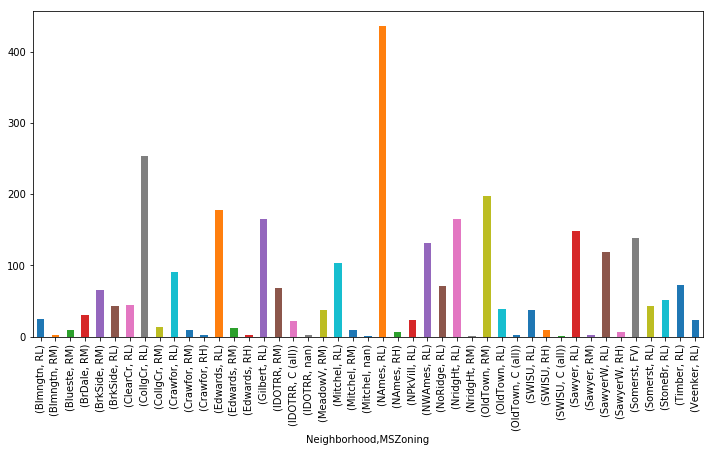

In [294]:
df_1=X['MSZoning'].groupby(X['Neighborhood']).value_counts(dropna=False)
df_1.plot(kind='bar',figsize=(12,6))

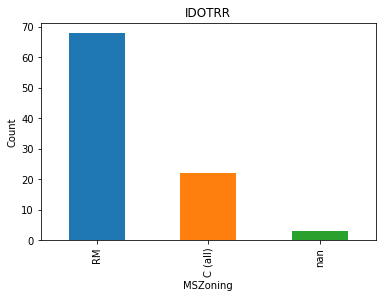

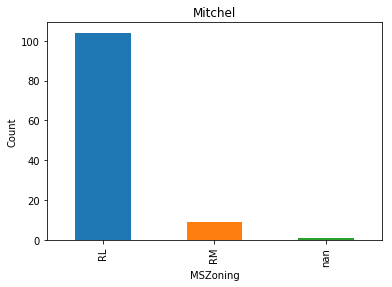

In [295]:
for neighbor in ('IDOTRR','Mitchel'):
    mask_1 = X['Neighborhood']== neighbor
    df_1=X.loc[mask_1,'MSZoning'].value_counts(dropna=False)
    df_1.plot(kind='bar',title = neighbor)
    plt.xlabel('MSZoning')
    plt.ylabel('Count')
    plt.show()

In [296]:
# Fill 

#  MSZoning('Neighborhood' = 'IDOTRR') NAN => 'RM' (most-occuring)
#  MSZoning('Neighborhood' = 'Mitchel') NAN => 'RL'(most-occuring)
for neighbor in ('IDOTRR','Mitchel'):
    mask_1 = X['Neighborhood']== neighbor
    most_occr = X.loc[mask_1,'MSZoning'].mode().iloc[0]
    X.loc[mask_1,'MSZoning'] = X.loc[mask_1,'MSZoning'].fillna(value=most_occr)
    
# Check after fill
X.loc[mask, cols]

,MSZoning,Neighborhood
1913,RM,IDOTRR
2214,RM,IDOTRR
2248,RM,IDOTRR
2902,RL,Mitchel


### Functional 

| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| Functional  | 0       | 2 | Home functionality (Assume typical unless deductions are warranted)                                           | object (types)

- Mode Imputation (based on 'OverallCond')

In [297]:
cols = ['Functional', 'OverallCond']
mask = X['Functional'].isnull()
X.loc[mask, cols]

,Functional,OverallCond
2214,NaN,5
2471,NaN,1


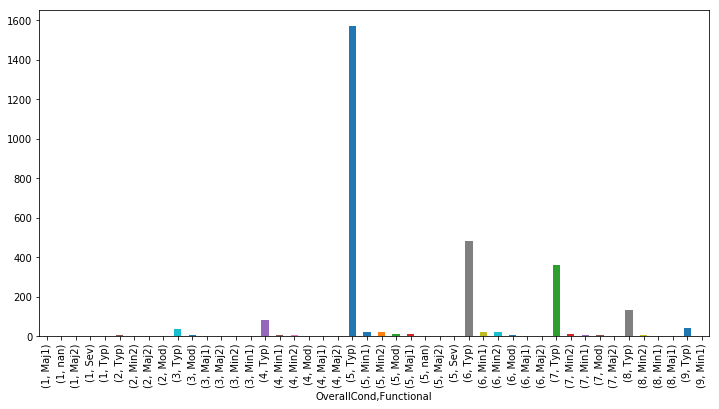

In [298]:
df_1=X['Functional'].groupby(X['OverallCond']).value_counts(dropna=False)
df_1.plot(kind='bar',figsize=(12,6))

In [299]:
# Filln: 
# 'OverallCond' = 1 : Functional NAN => Maj1 
# 'OverallCond' = 5 : Functional NAN => Typ 
for n in (1,5):
    mask_1 = X['OverallCond']==n
    most_occr = X.loc[mask_1,'Functional'].mode().iloc[0]
    X.loc[mask_1, 'Functional'] = X.loc[mask_1, 'Functional'].fillna(value=most_occr)

# Check after fill
X.loc[mask, cols]

,Functional,OverallCond
2214,Typ,5
2471,Maj1,1


### SaleType 

| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| SaleType  | 0       | 1 | Type of sale                                       | object (types)

- Mode Imputation (Based 'YrSold' =2007)

In [300]:
cols = ['SaleType','SaleCondition','YrSold']
mask = X[cols].isnull().any(axis=1)
X.loc[mask,cols]

,SaleType,SaleCondition,YrSold
2487,NaN,Normal,2007


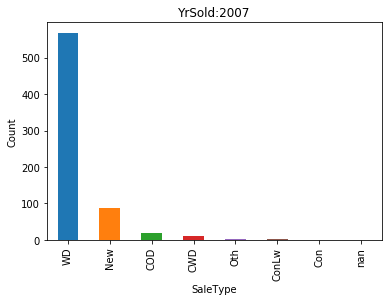

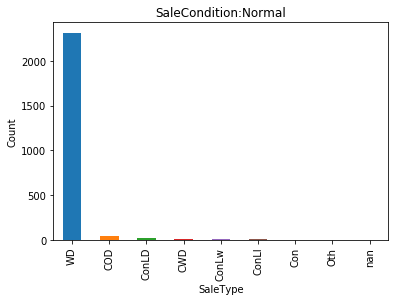

In [301]:
for value,name in [(2007, 'YrSold'),('Normal','SaleCondition')]:
    mask_1 = X[name]== value
    df_1=X.loc[mask_1,'SaleType'].value_counts(dropna=False)
    df_1.plot(kind='bar',title = name+':'+str(value))
    plt.xlabel('SaleType')
    plt.ylabel('Count')
    plt.show()

In [302]:
# fillna: NAN=> 'WD' (most-occuring type)
X['SaleType'] = X['SaleType'].fillna(value = 'WD')

# check after fill
X.loc[mask,cols]

,SaleType,SaleCondition,YrSold
2487,WD,Normal,2007


### KitchenQual    

| Columns      | Train-NaN | Test-NaN | Meaning                                              | Original Datatype |
|--------------|-----------|----------|------------------------------------------------------|-------------------|
| KitchenQual  | 0       | 1 | Kitchen quality                                      | object (types)|
| KitchenAbvGr  | 0       | 0 | Kitchens above grade                                     | int|

- Mode Imputation (based on 'KitchenAbvGr')

**NOTE - Name inconsistant in 'Ames.txt' & dataset**
- KithcneAbvGr(in Train&Test), Kitchen(in data_description.txt)

In [303]:
r = re.compile('.*Kitchen.*',re.IGNORECASE)
cols = list(filter(r.match, test.columns))
cols

['KitchenAbvGr', 'KitchenQual']

In [304]:
mask = X['KitchenQual'].isnull()
X.loc[mask][cols]

,KitchenAbvGr,KitchenQual
1553,1,NaN


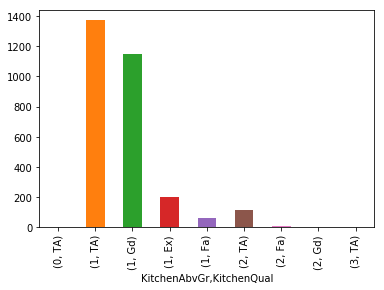

In [305]:
df_1 = X['KitchenQual'].groupby(X['KitchenAbvGr']).value_counts()
df_1.plot.bar()

In [306]:
# Filln:'KitchenQual' NAN => 'TA' (most occuring for 'KitchenAbvGr =1')
X['KitchenQual'] = X['KitchenQual'].fillna(value='TA')

# Check after fill
X.loc[mask][cols]

,KitchenAbvGr,KitchenQual
1553,1,TA


### Final Check Missing Value

In [307]:
X.isnull().sum().sum()

0

## Duplicates Check

In [308]:
for name, data in [('train', train),('test',test)]:
    cols = data.columns.drop('Id').tolist() #exclude "Id" 
    print('%s duplicated: %s' %(name, data[cols].duplicated().sum()))

train duplicated: 0
test duplicated: 0


## Export TRAIN,TEST to csv file

In [309]:
# train_a
n_train = train.shape[0]
train_a = X.iloc[0:n_train,:].copy()
train_a['SalePrice']=train['SalePrice']

# test_a
test_a = X.iloc[n_train:,:].copy()

In [310]:
train_a.shape, test_a.shape

((1458, 81), (1459, 80))

In [311]:
# save pre-processed train and test data to csv file
train_a.to_csv('train_a.csv', encoding='utf-8', index=False)
test_a.to_csv('test_a.csv', encoding='utf-8', index=False)

# Encode X

## One-Hot Encode 
- Categorical Features (Ordinal + Nominal) 
- except "OverallQual" & "OverallCond": with numerical value (1:10)

In [312]:
# Convert "MSSubclass" to "str" type
X['MSSubClass'] = X['MSSubClass'].astype(str)

In [313]:
# One-Hot Encode
X=pd.get_dummies(X)

# check size
print(X.shape)

(2917, 317)


### Cyclical Encoding - "Month"

In [314]:
# MoSold: Cyclical Treatment (sin, cos)
# divide a circle (2*pi) into 12 portions (12 = total num of months)
# each month represented a portion with it sin & cos values
X['MoSold_sin'] = np.sin(X['MoSold']*(2*np.pi/12))
X['MoSold_cos'] = np.cos(X['MoSold']*(2*np.pi/12))
X.drop(columns=['MoSold'], inplace=True) #drop 'MoSold' col 
print(X.shape)
X[['MoSold_sin','MoSold_cos']].head(3)

(2917, 318)


,MoSold_sin,MoSold_cos
0,0.866025,5.000000e-01
1,0.500000,-8.660254e-01
2,-1.000000,-1.836970e-16


## Export TRAIN_a1,TEST_a1 to csv file

In [315]:
# train_a1
train_a1 = X.iloc[0:n_train,:].copy()
train_a1['SalePrice']=train['SalePrice']

# test_a1
test_a1 = X.iloc[n_train:,:].copy()

# size
print(train_a1.shape, test_a1.shape)

# save pre-processed train and test data to csv file
train_a1.to_csv('train_a1.csv', encoding='utf-8', index=False)
test_a1.to_csv('test_a1.csv', encoding='utf-8', index=False)

(1458, 319) (1459, 318)


## Skewness

- Skewness Score
    - Based on [diogo-menezes-borges](https://medium.com/diogo-menezes-borges/project-2-predicting-house-prices-on-kaggle-989f1b0c4ef6)

In [316]:
from scipy.stats import skew

In [317]:
# Retrieve Numeric Features
num_cols = test.dtypes[test.dtypes!=object].index.tolist()
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [318]:
# Remove a few categorical features with int/float datatype
for col in ['Id','MSSubClass','MoSold','YrSold','GarageYrBlt','YearBuilt','YearRemodAdd','OverallQual','OverallCond']:
    num_cols.remove(col)
print(num_cols)    

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [319]:
# compute skewness score
skewness = X[num_cols].apply(skew)
skewness.sort_values()

GarageCars       -0.218309
FullBath          0.165514
GarageArea        0.219031
BedroomAbvGr      0.326568
BsmtFullBath      0.622415
TotalBsmtSF       0.671751
HalfBath          0.696666
Fireplaces        0.725278
TotRmsAbvGrd      0.749232
2ndFlrSF          0.861556
BsmtUnfSF         0.919688
BsmtFinSF1        0.980645
LotFrontage       1.013517
GrLivArea         1.068750
1stFlrSF          1.257286
WoodDeckSF        1.844792
OpenPorchSF       2.529358
MasVnrArea        2.621719
BsmtHalfBath      3.929996
ScreenPorch       3.945101
EnclosedPorch     4.002344
BsmtFinSF2        4.144503
KitchenAbvGr      4.300550
3SsnPorch        11.372080
LowQualFinSF     12.084539
LotArea          13.109495
PoolArea         17.688664
MiscVal          21.939672
dtype: float64

- log transform 
    1. all area related numerical features, despite the skewness (to keep them on the same scale)
    2. features with skewness above 1

In [321]:
# retrieve cols with skewness >1
skew_cols = skewness[abs(skewness)>1].index.tolist()
area_cols = ['GarageArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF1']
cols = skew_cols+area_cols
cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'GarageArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtUnfSF',
 'BsmtFinSF1']

In [322]:
# log transform on all numerical features of X 
X[cols] = np.log1p(X[cols])

`divide by zero encountered in log
(so switched to log1p)`

## Export TRAIN_a2,TEST_a2 to csv file

In [ ]:
# train_a2
train_a2 = X.iloc[0:n_train,:].copy()
train_a2['SalePrice']=train['SalePrice']

# test_a2
test_a2 = X.iloc[n_train:,:].copy()

# size
print(train_a2.shape, test_a2.shape)

# save pre-processed train and test data to csv file
train_a2.to_csv('train_a2.csv', encoding='utf-8', index=False)
test_a2.to_csv('test_a2.csv', encoding='utf-8', index=False)